# Observed and simulated internal variability climate feedbacks comparison. 
Geocomputation and Machine learning

Alejandro Uribe

## 1. Project description

In the presence of radiative forcings ($F$), the climate system reestablishes its energy balance by increasing the mean global temperature ($T$). This increase of temperature produces secondary forcing fluxes which are proportional to the initial response ($\lambda T$). The additional feedback fluxes are added to the initial forcing, leading to a final response (Lindzen et al, 2001).  Examples of such a mechanism are cloud feedbacks; clouds are important in the energetic balance of the earth since they both reflect shortwave radiation coming from the sun back to space and longwave to the surface. For example, if high cloud cover from deep convective clouds in the tropics decreases with warming (Iris effect), more longwave would escape to space (negative longwave feedback), but if stratocumulus clouds from shallow convection in the subtropics decrease more shortwave would reach the surface (positive shortwave feedback). 

A typical approach to quantify the feedback mechanism is to consider the planetary energy balance at the top of the atmosphere (TOA), represented as:

\begin{equation}\label{R}\tag{1}
R=F+\lambda T
\end{equation}

where $R$ is the net TOA radiative flux anomaly, $\lambda$ is the radiative feedback parameter and $T$ is the global mean surface air temperature anomaly (Zelinka et al, 2020). Generally, to diagnose climate feedbacks, $T$ and $R$ are estimated using coupled ocean-atmosphere General Circulation Models (GCM's) in which atmospheric concentrations of carbon dioxide are abruptly quadruplet from their preindustrial concentration and held fixed. However, those diagnosed feedbacks are not easily comparable with observations and thus their validity is uncertain. 

In this project, I used a different approach in which, instead of utilizing $CO_2$ forcings, I estimated the feedback parameter produced by climate variations over time resulting from natural causes (internal variability) using observations. Similar ideas have been used before (Mauritsen & Stevens, 2015 for example); however, their approach focussed particularly on the tropics and the extent of their observational dataset is small compared to today. As the second step in this project, I  diagnosed the same feedbacks from a set of model simulations of historical climate from the last generation of the Coupled Model Intercomparison Project (CMIP6) and compared them with those from observations. Finally, I wondered about potential relations between simulated feedbacks due to natural variability and $CO_2$ forcings. This project is framed within the <b>GeoCompuation</b> component of the lecture.
 


## 2. Data set and Methods

## 2.1 Data

Diagnosis of internal variability feedbacks were produced using observations, whereas simulated feedbacks from model simulations. The data description is as follows.

## 2.1.1 Observations

To estimate observed internal variability feedbacks and cloud properties, I used:

* TOA shortwave and longwave fluxes (clear sky and all sky) at monthly in 1° × 1° regions from satellite data of the Clouds and the Earth’s Radiant Energy System (CERES) instruments and “Energy Balanced and Filled” (EBAF) updated to version Ed4.1.
* Cloud properties stratified by cloud optical depth and pressure from CERES-MODIS/VIIRS and GEO.
* Gridded temperatuere anolimalies datase from the latest version of HadCRUT(5) analysis

Observations were obtained from https://ceres.larc.nasa.gov/data/  and https://crudata.uea.ac.uk/cru/data/temperature/, respectvely.

## 2.1.2 Simulations

To estimate simulated internal variability feedbacks, I used TOA shortwave and longwave fluxes (clear sky (CS) and all sky) and air temperature from historical simulations of global coupled climate models produced for the sixth phase of Coupled Model Intercomparison Project (CMIP) and Atmospheric Model Intercomparison Project (AMIP) (Table 1.). In these simulations, boundary conditions (e.g irradiation, aerosols, orbital parameters, and green house concentration in the atmosphere) represent those estimated for the historical period starting in 1850 and ending in 2014 (Fiedler et al, 2020).

To investigate if the simulated internal variability feedbacks relate to simulated $CO_2$ forcing feedbacks, I used outputs from CMIP6 in which atmospheric $CO_2$ concentrations were abruptly quadruplet from their preindustrial concentration and held fixed (abrupt-4xCO2) (Zelinka et al 2020).

All simulated data was downloaded from the Deutsches KlimaRechenZentrum (DKRZ) data repository, using the DKRZ CMIP data pool (https://www.dkrz.de/up/services/data-management/cmip-data-pool). I constrained both observational and simulations datasets to their overlaping period, 2001 to 2014. Finally, Cloud Radiative Effects (CRE - the amount of energy that would return to space if there were no clouds, minus the amount that escapes with clouds present.) fluxes were calculated in both observations and simulations by substracting CS from all-sky fluxes. 

| Model | CMIP6 historical | AMIP | abrupt-4xCO2 |
| --- | :-: | :-: | :-: |
| ACCESS-CM2 | X | X | X |
| ACCESS-ESM1-5 | X | X | X |
| AWI-CM-1-1-MR | X |  |  |
| AWI-ESM-1-1-LR | X |  |  |
| BCC-CSM2-MR | X | X | X |
| CAMS-CSM1-0 | X | X | X |
| CanESM5 | X | X |  |
| CESM2 | X | X | X |
| CESM2-FV2 | X | X | X |
| CESM2-WACCM | X | X | X |  |
| CESM2-WACCM-FV2 | X | X | X |
| CMCC-CM2-HR4 | X |  |  |
| CMCC-CM2-SR5 | X | X | X |
| CMCC-ESM2 | X |  |  |
| FGOALS-g3 | X | X |  |
| GISS-E2-1-G | X | X | X |
| GISS-E2-1-G-CC | X |  |  |
| GISS-E2-1-H | X |  | X |
| IITM-ESM | X | X | X |
| MIROC6 | X | X | X |
| MPI-ESM-1-2-HAM | X | X | X |
| MPI-ESM1-2-HR | X | X | X |
| MPI-ESM1-2-LR | X | X | X |
| MRI-ESM2-0 | X | X | X |
| NESM3 | X | X | X |
| NorCPM1 | X | X |  |
| NorESM2-LM | X | X |  |
| NorESM2-MM | X |  |  |
| SAM0-UNICON | X | X | X |
| TaiESM1 | X |  |  |
| BCC-ESM |  | X |  |

*Table 1. Models used.*

## 2.2 Methods

## 2.2.1 Preprocessing

Figure 1. shows the global mean temperature anomaly time series from 1850 to 2021 (even though the period extension is larger than the one I used to diagnose internal variability feedbacks, it helps us to visualize the most important fluctuations in the time series as example). The large time scale positive trend (red line) is related to anthropogenic warming and thus is does not belong to internal variability. On the othere side, the high-frequency oscillation is a print of seasonality. Both trends do not correspond to monthly climate variability and thus it is important to remove them before performing the feedbacks diagnosis. To that end, I used Climate Data Operators (CDO) within a bash pre-analysis script as showed in the cell after the figure.

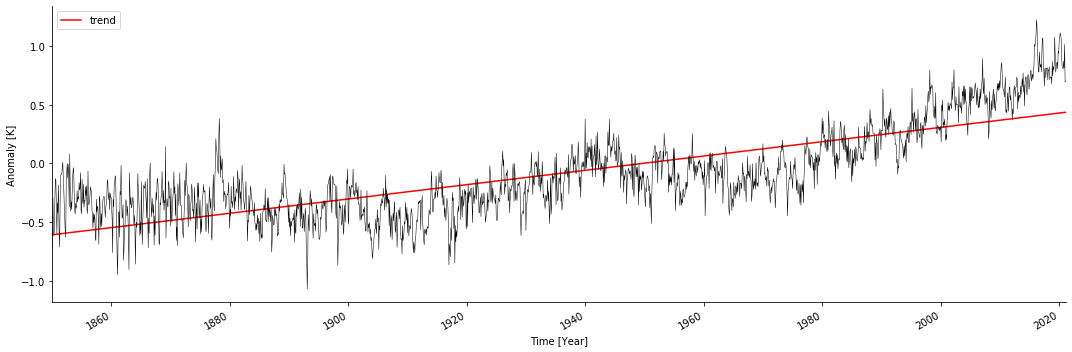

In [3]:
%matplotlib inline
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os
input_data='/home/alejandro/CL_feedbacks/data/'
DATA= xr.open_dataset(input_data+'HadCRUT/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc')
#os.system('cdo -trend -fldmean '+input_data+'HadCRUT/HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc afile.nc bfile.nc')
a=xr.open_dataset('afile.nc')
b=xr.open_dataset('bfile.nc')
trend= (a.tas_mean.values+b.tas_mean.values*np.arange(len(DATA.time)))[0][0]
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(DATA.time.squeeze(),trend, color='red',label='trend')
weights = np.cos(np.deg2rad(DATA.latitude))
weights.name = "weights"
DATA.tas_mean.weighted(weights).mean(dim=('latitude','longitude')).plot(color='black', lw=0.5)
ax.set_title('')
ax.set_ylabel('Anomaly [K]')
ax.set_xlabel('Time [Year]')
ax.set_xlim(DATA.time.min(),DATA.time.max())
ax.legend()
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.tight_layout()
plt.savefig('T_timeseries.pdf', format='pdf')

*Figure 1. Global mean temperature anomaly time series. Values were weighted by the cosine of their latitude before taking the mean. Trend is displayed as the red line.*

## Bash script to preprocess observations (detrend and deseasonalize)

In [5]:
%%writefile observations_preprocessing.sh

#!/bin/bash
##################################################################
#                           1. HadCRUT                           #
##################################################################

dir='/home/alejandro/CL_feedbacks/data/HadCRUT/'

######### Selecting overlaping period ######################################

cdo selyear,2001/2014 ${dir}HadCRUT.5.0.1.0.analysis.anomalies.ensemble_mean.nc ${dir}HadCRUT.5.0.1.0.mean_2001_2014_mon.nc

######### Removing seasonality #############################################

cdo -sub ${dir}HadCRUT.5.0.1.0.mean_2001_2014_mon.nc -ymonmean ${dir}HadCRUT.5.0.1.0.mean_2001_2014_mon.nc ${dir}desea_HadCRUT.5.0.1.0.mean_2001_2014_mon.nc 

######### Removing trend ###################################################

cdo -detrend ${dir}desea_HadCRUT.5.0.1.0.mean_2001_2014_mon.nc ${dir}detre_desea_HadCRUT.5.0.1.0.mean_2001_2014_mon.nc

######### Removing temporary files #########################################

rm ${dir}HadCRUT.5.0.1.0.mean_2001_2014_mon.nc ${dir}desea_HadCRUT.5.0.1.0.mean_2001_2014_mon.nc

##################################################################
#                           2. CERES                             #
##################################################################

dir='/home/alejandro/CL_feedbacks/data/CERES/'

######### Selecting overlaping period ######################################

cdo selyear,2001/2014 ${dir}CERES_EBAF_Ed4.1_Subset_200101-201912.nc ${dir}CERES_EBAF-TOA_Ed4.1_Subset_2001-2014.nc

######### Calculating anomalies ############################################

cdo sub ${dir}CERES_EBAF-TOA_Ed4.1_Subset_2001-2014.nc -timmean ${dir}CERES_EBAF-TOA_Ed4.1_Subset_2001-2014.nc ${dir}flux_anom_200101-201412.nc

######### Removing seasonality #############################################

cdo -sub ${dir}flux_anom_200101-201412.nc -ymonmean ${dir}flux_anom_200101-201412.nc ${dir}desea_flux_anom_200101-201412.nc

######### Removing trend ###################################################

cdo -detrend ${dir}desea_flux_anom_200101-201412.nc ${dir}tmp.nc 

##################################################################
#                2. Cloud properties                             #
##################################################################

# TOP quantitites

######### Calculating anomalies ############################################

cdo sub ${dir}CERES_CldTypHist-MON_GEO-MODIS_Ed4.1_Subset_200101-201412.nc -timmean ${dir}CERES_CldTypHist-MON_GEO-MODIS_Ed4.1_Subset_200101-201412.nc ${dir}CldTypHist_anom_200101-201412.nc

######### Removing seasonality #############################################

cdo -sub ${dir}CldTypHist_anom_200101-201412.nc -ymonmean ${dir}CldTypHist_anom_200101-201412.nc ${dir}desea_CldTypHist_anom_200101-201412.nc

######### Removing trend ###################################################

cdo -detrend ${dir}desea_CldTypHist_anom_200101-201412.nc ${dir}detre_desea_CldTypHist_anom_200101-201412.nc

######### Removing temporary files #########################################

rm ${dir}desea_CldTypHist_anom_200101-201412.nc ${dir}CldTypHist_anom_200101-201412.nc

Overwriting observations_preprocessing.sh


## Bash script to preprocess simulations CMIP6 historical (detrend and deseasonalize)

In [6]:
%%writefile models_historical_preprocessing.sh
#!/bin/bash
dir='/home/alejandro/CL_feedbacks/data/CMIP6_historical/'
input="models"
while IFS= read -r line
do
	for var in rlut_ rlutcs_ rsut_ rsutcs_ ts_
	do
		mkdir /home/alejandro/CL_feedbacks/data/CMIP6_historical/${line}
		dir_out=/home/alejandro/CL_feedbacks/data/CMIP6_historical/${line}
        rm ${dir_out}/${var}2001_2014.nc
		if test -f "${dir_out}/${var}2001_2014.nc"
		then
			echo ${var}185001-201412.nc 'exist!'
		else
			cd ${dir_out}
			cdo -selyear,2001/2014 ${var}185001-201412.nc ${var}2001_2014.nc
			cdo -sub ${var}2001_2014.nc -timmean ${var}2001_2014.nc ${var}anom.nc
			cdo -ymonmean ${var}anom.nc ${var}seasons.nc
			cdo -sub ${var}anom.nc ${var}seasons.nc desea_${var}anom.nc
			cdo -detrend desea_${var}anom.nc detre_desea_${var}anom.nc
			rm ${var}anom.nc ${var}seasons.nc desea_${var}anom.nc
			echo ${line} desea_${var}anom.nc 'Created!'	
		fi
	done
done < "$input"

Overwriting models_historical_preprocessing.sh


## Bash script to preprocess simulations AMIP (detrend and deseasonalize)

In [4]:
%%writefile models_amip_preprocessing.sh
#!/bin/bash
dir='/home/alejandro/CL_feedbacks/data/down_amip/'
input="models_amip"
mkdir /home/alejandro/CL_feedbacks/data/AMIP_alejandro
while IFS= read -r line
do
	for var in rlut_ rlutcs_ rsut_ rsutcs_ ts_
	do
		mkdir /home/alejandro/CL_feedbacks/data/AMIP/${line}
		dir_out=/home/alejandro/CL_feedbacks/data/AMIP/${line}
		if test -f "${dir_out}/${var}2001_2014.nc"
		then
			echo detre_desea_${var}anom.nc 'exist!'
		else
			cd ${dir_out}
			cdo -selyear,2001/2014 ${var}197901-201412.nc ${var}2001_2014.nc
			cdo -sub ${var}2001_2014.nc -timmean ${var}2001_2014.nc ${var}anom.nc
			cdo -ymonmean ${var}anom.nc ${var}seasons.nc
			cdo -sub ${var}anom.nc ${var}seasons.nc desea_${var}anom.nc
			cdo -detrend desea_${var}anom.nc detre_desea_${var}anom.nc
			rm ${var}anom.nc ${var}seasons.nc desea_${var}anom.nc
			echo ${line} desea_${var}anom.nc 'Created!'	
		fi
	done
done < "$input"

Overwriting models_amip_preprocessing.sh


## Bash script to preprocess simulations CMIP6 piControl and Abrupt

In [3]:
%%writefile models_pi_ab_preprocessing.sh
#!/bin/bash
dir='/home/alejandro/CL_feedbacks/data/CMIP6_piControl-Abrupt/'
input="models_pi_ab"
while IFS= read -r line
do
	for exp in abrupt-4xCO2 piControl
	do
		for var in rlut_ rlutcs_ rsut_ rsutcs_ ts_
		do
			mkdir /home/alejandro/CL_feedbacks/data/CMIP6_piControl-Abrupt_ale/${line}
			dir_out=/home/alejandro/CL_feedbacks/data/CMIP6_piControl-Abrupt_ale/${line}
			if test -f "${dir_out}/ymean_${var}${exp}.nc"
			then
				echo ${var}${exp}.nc 'exist!'
			else
				cd ${dir}${line}/${exp}
				cdo -yearmean ${dir_out}/${var}${exp}.nc ${dir_out}/ymean_${var}${exp}.nc
				rm ${dir_out}/${var}${exp}.nc # remove later
			fi
		done
	done
done < "$input"

Overwriting models_pi_ab_preprocessing.sh


Figure 2. shows an example of the deseasonalized and detrended data to diagnose the feedbacks for the overlaping period.

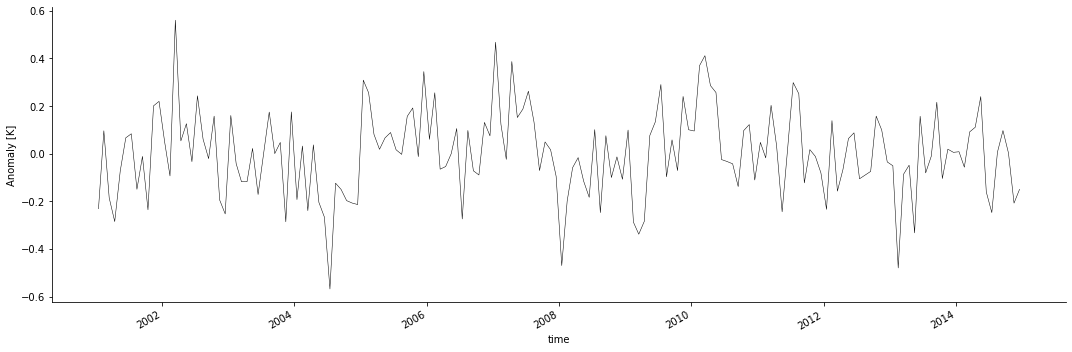

In [2]:
%matplotlib inline
import xarray as xr
import matplotlib.pyplot as plt
input_data='/home/alejandro/CL_feedbacks/data/'
DATA= xr.open_dataset(input_data+'HadCRUT/detre_desea_HadCRUT.5.0.1.0.mean_2001_2014_mon.nc')
fig, ax = plt.subplots(figsize=(15,5))
DATA.tas_mean.mean(dim=('latitude','longitude')).plot(color='black', lw=0.5)
ax.set_title('')
ax.set_ylabel('Anomaly [K]')
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.tight_layout()
plt.savefig('T_timeseries_detre_desea.pdf', format='pdf')

*Figure 2. Global mean detrended and deseasonalized air temperature anomaly time series. Values were weighted by the cosine of their latitude before taking the mean.*

To verify if the resulting data is in reality related to internal climate variability, I decided to decomposed the signal of the radiation fluxes and compared it with the sign of El Niño South Oscillation (ENSO), which perhaps is the most relevant sample of internal variability. To do that, I extracted the principal component (PC) of the leading mode of the empirical orthogonal functions (EOF's) of the global mean time series of TOA shortwave and longwave anomalies and compared it with sea surface temperature anomalies in the region NINO 3.4. The high correlation between shortwave and longwave with El NINO 3.4 index indicates that the preprocessing filters produced internal variability data (Figure 3).

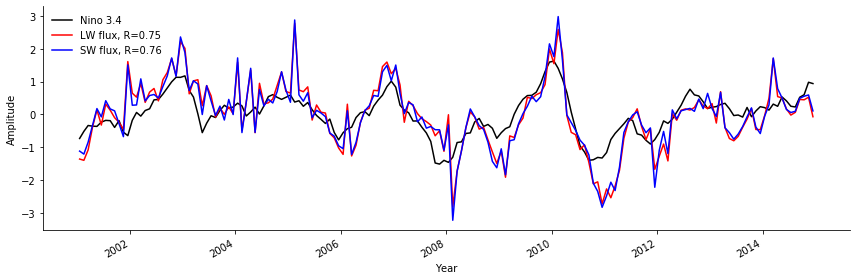

In [2]:
%matplotlib inline
import numpy as np
from eofs.xarray import Eof
DATA_tmp=xr.open_dataset(input_data+'HadCRUT/detre_desea_HadCRUT.5.0.1.0.mean_2001_2014_mon.nc')
DATA_flux=xr.open_dataset(input_data+'CERES/detre_desea_flux_anom_200101-201412.nc', decode_times=False)
#LW
lw_flux=DATA_flux.toa_lw_all_mon
coslat = np.cos(np.deg2rad(DATA_flux.coords['lat'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(lw_flux, weights=wgts)
eof_flux_lw = solver.eofsAsCorrelation(neofs=1)
pc_flux_lw = solver.pcs(npcs=1, pcscaling=1)
var_lw=solver.varianceFraction(neigs=7)
#SW
sw_flux=DATA_flux.toa_sw_all_mon
solver = Eof(sw_flux, weights=wgts)
eof_flux_sw = solver.eofsAsCorrelation(neofs=1)
pc_flux_sw = solver.pcs(npcs=1, pcscaling=1)
var_sw=solver.varianceFraction(neigs=7)
# Anomalies NINO 3.4
sst_anom=DATA_tmp.tas_mean
sst_anom_34=sst_anom.sel(latitude=slice(-5,5), longitude=slice(-170,-120)).mean(dim=('latitude','longitude'))
# Plot
fig, ax = plt.subplots(figsize=(12,4))
R_LW=np.round(np.corrcoef(sst_anom_34,pc_flux_lw[:,0])[0,1],2)
R_SW=np.round(np.corrcoef(sst_anom_34,pc_flux_sw[:,0])[0,1],2)
sst_anom_34.plot(label='Nino 3.4',color='black')
pc_flux_lw['time']=sst_anom_34.time
pc_flux_lw.plot(label='LW flux, R='+str(R_LW),color='r')
pc_flux_sw['time']=sst_anom_34.time
pc_flux_sw.plot(label='SW flux, R='+str(R_SW),color='b')
ax.set_title('')
ax.set_ylabel('Amplitude')
ax.set_xlabel('Year')
ax.legend(frameon=False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.tight_layout()
plt.savefig('PC_1EOF.pdf', format='pdf')

*Figure 3. PC of leading EOF of TOA fluxes and SST anomalies Niño 3.4.*

## 2.2.2 Feedbacks 

Shortwave and longwave feedbacks were calculated from both observations and simulations using the linear regression coefficients between radiative fluxes anomalies and air temperature anomalies (equation 3 and 4). The following cell shows the python function used for that purpose, including the 95% confidence interval.

\begin{equation}\label{Rl}\tag{2}
R_L=F_L+\lambda_LT
\end{equation}

\begin{equation}\label{Rs}\tag{3}
R_S=F_S+\lambda_ST
\end{equation}

where the subindexes $L$ and $S$ indicate longwave and shortwave, respectively.

In [5]:
def regression(sst_mean, y_values):
    x = sm.add_constant(sst_mean.values)
    y = y_values.values
    model = sm.OLS(y, x, missing='drop')
    fitted = model.fit()
    # Confidence intervals
    IC=fitted.conf_int(alpha=0.05,cols=[1])
    return(fitted.params[1],IC)

Instead of diagnosing global feedbacks, I decided to take a different approach. First, I divided the globe into "boxes" of 10° latitudinal width from 90°S to 90°N. Then, I calculated the feedbacks within each box and the mean feedback between the hemispherical equivalent boxes. I applied this methodology to differentiate potential feedbacks behaviors from the tropics to the poles. 

This method requires the calculation of 18 feedback-boxes for 2 radiative fluxes in observations times 30 models from CMIP6 and 23 models in AMIP for a total of 990 regressions. The process was repeated for clear sky, all-sky, and cloud radiative effects fluxes for a final total of 2970 regressions. To that end, the following python code was applied to produce npz files with NumPy arrays containing the results.

In [6]:
%%writefile feedbacks.py
import xarray as xr
import numpy as np
import statsmodels.api as sm
import glob
input='/home/alejandro/CL_feedbacks/data/'
output='/home/alejandro/CL_feedbacks/data_prod/'
North=np.arange(0,90,10)
South=np.arange(0,-90,-10)
full=[North,South]
for Hem in full:
    if np.all(Hem == North):
        upp=10
        H='North'
    elif np.all(Hem == South):
        upp=-10
        H='South'
    for rad in ('all','cs','cre'):
        if rad == 'all':
            IR='rlut'
            IR_obs='toa_lw_all_mon'
            SR='rsut'
            SR_obs='toa_sw_all_mon'
        elif rad=='cs':
            IR='rlutcs'
            IR_obs='toa_lw_clr_c_mon'
            SR='rsutcs'
            SR_obs='toa_sw_clr_c_mon'
        else:
            IR='rlutcre'
            IR_obs='toa_lw_cre_mon'
            SR='rsutcre' 
            SR_obs='toa_sw_cre_mon'
        savez_dict = dict()
        for l,domain in enumerate(('Global','Local')):
            feed_lw=np.zeros(9)
            feed_sw=np.zeros_like(feed_lw)
            top_lw_IC=np.zeros_like(feed_lw)
            bot_lw_IC=np.zeros_like(feed_lw)
            top_sw_IC=np.zeros_like(feed_lw)
            bot_sw_IC=np.zeros_like(feed_lw)
            for j,i, in enumerate(Hem):
                #-----------------------------------------------------------------
                #------------------------ OBS ------------------------------------
                #-----------------------------------------------------------------
                DATA_sst=xr.open_dataset(input+'HadCRUT/detre_desea_HadCRUT.5.0.1.0.mean_2001_2014_mon.nc')
                sst_anom=DATA_sst.tas_mean
                weights = np.cos(np.deg2rad(DATA_sst.latitude))
                weights.name = "weights"
                if domain=='Local':           
                    sst_anom=sst_anom.sel(latitude=slice(min(i,i+upp),max(i,i+upp)))
                    weights = np.cos(np.deg2rad(sst_anom.latitude))
                    weights.name = "weights"
                sst_mean=sst_anom.weighted(weights).mean(dim=('latitude','longitude'), skipna=True)
                DATA_flux=xr.open_dataset(input+'CERES/detre_desea_flux_anom_200101-201412.nc', decode_times=False)
                sw_flux=DATA_flux[SR_obs].sel(lat=slice(min(i,i+upp),max(i,i+upp)))
                weights = np.cos(np.deg2rad(sw_flux.lat))
                weights.name = "weights"
                lw_flux=DATA_flux[IR_obs].sel(lat=slice(min(i,i+upp),max(i,i+upp)))
                #
                sw_mean=sw_flux.weighted(weights).mean(dim=('lat','lon'))
                lw_mean=lw_flux.weighted(weights).mean(dim=('lat','lon'))
                #------------------------ SW FLUX ------------------------------------
                m_sw,sw_IC=regression(sst_mean,-sw_mean)
                bot_sw_IC[j]=np.min(sw_IC)
                top_sw_IC[j]=np.max(sw_IC)
                feed_sw[j]=m_sw
                #------------------------ LW FLUX ------------------------------------
                m_lw,lw_IC=regression(sst_mean,-lw_mean)
                bot_lw_IC[j]=np.min(lw_IC)
                top_lw_IC[j]=np.max(lw_IC)
                feed_lw[j]=m_lw
            savez_dict['feed_lw_'+domain] = feed_lw
            savez_dict['top_lw_IC_'+domain] = top_lw_IC
            savez_dict['bot_lw_IC_'+domain] = bot_lw_IC
            savez_dict['feed_sw_'+domain] = feed_sw
            savez_dict['top_sw_IC_'+domain] = top_sw_IC
            savez_dict['bot_sw_IC_'+domain] = bot_sw_IC
            for exp in (('CMIP6_historical','AMIP','CMIP6_4xCO2')):
                    models=[]
                    for i in glob.glob(input+exp+'/*'):
                        models.append(i.replace('/home/alejandro/CL_feedbacks/data/'+exp,''))
                    mean_lw=np.zeros_like(feed_lw)
                    mean_sw=np.zeros_like(feed_sw)
                    mod_m_lw=np.zeros_like(feed_lw)
                    mod_m_sw=np.zeros_like(feed_lw)
                    mod_lw_IC_min=np.zeros_like(feed_lw)
                    mod_sw_IC_min=np.zeros_like(feed_lw)
                    mod_lw_IC_max=np.zeros_like(feed_lw)
                    mod_sw_IC_max=np.zeros_like(feed_lw)
                    mean_mod_lw=[]
                    mean_mod_sw=[]
                    for mod in models:
                        #-----------------------------------------------------------------
                        #------------------------ MODELS ---------------------------------
                        #-----------------------------------------------------------------
                        for j,i, in enumerate(Hem):
                            LW=xr.open_dataset(input+exp+mod+'/detre_desea_'+IR+'_anom.nc')
                            rlut=LW[IR.replace('cre','')].sel(lat=slice(min(i,i+upp),max(i,i+upp)))
                            weights_mod = np.cos(np.deg2rad(rlut.lat))
                            weights_mod.name = "weights"
                            rlut=rlut.weighted(weights_mod).mean(dim=('lat','lon'))
                            SW=xr.open_dataset(input+exp+mod+'/detre_desea_'+SR+'_anom.nc')
                            rsut=SW[SR.replace('cre','')].sel(lat=slice(min(i,i+upp),max(i,i+upp)))
                            rsut=rsut.weighted(weights_mod).mean(dim=('lat','lon'))
                            TS=xr.open_dataset(input+exp+mod+'/detre_desea_ts_anom.nc')
                                if domain=='Global':
                                    weights_glob = np.cos(np.deg2rad(TS.lat))
                                    weights_glob.name = "weights"
                                    ts=TS.ts.weighted(weights_glob).mean(dim=('lat','lon'))
                                #------------------------ SW FLUX ------------------------------------
                                m_sw,sw_IC=regression(ts,-rsut)
                                mod_m_sw[j]=m_sw
                                mod_sw_IC_min[j]=np.min(sw_IC)
                                mod_sw_IC_max[j]=np.max(sw_IC)
                                #------------------------ LW FLUX ------------------------------------
                                m_lw,lw_IC=regression(ts,-rlut)
                                mod_m_lw[j]=m_lw
                                mod_lw_IC_min[j]=np.min(lw_IC)
                                mod_lw_IC_max[j]=np.max(lw_IC)
                            else:
                                LW_pi=xr.open_dataset(input+exp+mod+'/ymean_'+IR+'_piControl.nc',use_cftime=False,decode_times=False).isel(time=slice(None,150))
                                LW_ab=xr.open_dataset(input+exp+mod+'/ymean_'+IR+'_abrupt-4xCO2.nc',use_cftime=False,decode_times=False).isel(time=slice(None,150))
                                rlut_pi=LW_pi[IR.replace('cre','')].sel(lat=slice(min(i,i+upp),max(i,i+upp)))
                                rlut_ab=LW_ab[IR.replace('cre','')].sel(lat=slice(min(i,i+upp),max(i,i+upp)))
                                weights_mod = np.cos(np.deg2rad(rlut_pi.lat))
                                weights_mod.name = "weights"
                                rlut=rlut_ab.weighted(weights_mod).mean(dim=('lat','lon'))-rlut_pi.weighted(weights_mod).mean(dim=('lat','lon'))
                                SW_pi=xr.open_dataset(input+exp+mod+'/ymean_'+SR+'_piControl.nc',use_cftime=False,decode_times=False).isel(time=slice(None,150))
                                SW_ab=xr.open_dataset(input+exp+mod+'/ymean_'+SR+'_abrupt-4xCO2.nc',use_cftime=False,decode_times=False).isel(time=slice(None,150))
                                rsut_pi=SW_pi[SR.replace('cre','')].sel(lat=slice(min(i,i+upp),max(i,i+upp)))
                                rsut_ab=SW_ab[SR.replace('cre','')].sel(lat=slice(min(i,i+upp),max(i,i+upp)))
                                rsut=rsut_ab.weighted(weights_mod).mean(dim=('lat','lon'))-rsut_pi.weighted(weights_mod).mean(dim=('lat','lon'))
                                TS_pi=xr.open_dataset(input+exp+mod+'/ymean_ts_piControl.nc',use_cftime=False,decode_times=False).isel(time=slice(None,150))
                                TS_ab=xr.open_dataset(input+exp+mod+'/ymean_ts_abrupt-4xCO2.nc',use_cftime=False,decode_times=False).isel(time=slice(None,150))
                                if domain=='Global':
                                    weights_glob = np.cos(np.deg2rad(TS_pi.lat))
                                    weights_glob.name = "weights"
                                    ts=TS_ab.ts.weighted(weights_glob).mean(dim=('lat','lon'))-TS_pi.ts.weighted(weights_glob).mean(dim=('lat','lon'))
                                else:
                                    ts_pi=TS_pi.ts.sel(lat=slice(min(i,i+upp),max(i,i+upp)))
                                    ts_ab=TS_ab.ts.sel(lat=slice(min(i,i+upp),max(i,i+upp)))
                                    ts=ts_ab.weighted(weights_mod).mean(dim=('lat','lon'))-ts_pi.weighted(weights_mod).mean(dim=('lat','lon'))
                                #------------------------ SW FLUX ------------------------------------
                                m_sw,sw_IC=regression(ts,-rsut)
                                mod_m_sw[j]=m_sw
                                mod_sw_IC_min[j]=np.min(sw_IC)
                                mod_sw_IC_max[j]=np.max(sw_IC)
                                #------------------------ LW FLUX ------------------------------------
                                m_lw,lw_IC=regression(ts,-rlut)
                                mod_m_lw[j]=m_lw
                                mod_lw_IC_min[j]=np.min(lw_IC)
                                mod_lw_IC_max[j]=np.max(lw_IC)
                        mean_mod_lw.append(np.copy(mod_m_lw))
                        mean_mod_sw.append(np.copy(mod_m_sw))
                        savez_dict[exp+'_'+mod.replace('/','')+'_m_lw_'+domain] = np.copy(mod_m_lw)
                        savez_dict[exp+'_'+mod.replace('/','')+'_lw_IC_min_'+domain] = np.copy(mod_lw_IC_min)
                        savez_dict[exp+'_'+mod.replace('/','')+'_lw_IC_max_'+domain] = np.copy(mod_lw_IC_max)
                        savez_dict[exp+'_'+mod.replace('/','')+'_m_sw_'+domain] = np.copy(mod_m_sw)
                        savez_dict[exp+'_'+mod.replace('/','')+'_sw_IC_min_'+domain] = np.copy(mod_sw_IC_min)
                        savez_dict[exp+'_'+mod.replace('/','')+'_sw_IC_max_'+domain] = np.copy(mod_sw_IC_max)
                    savez_dict['mean_mod_lw_'+exp+'_'+domain] = np.mean(mean_mod_lw,axis=0) 
                    savez_dict['mean_mod_sw_'+exp+'_'+domain] = np.mean(mean_mod_sw,axis=0)
        np.savez(output+'Feed_Ftropics_'+rad+'_NOSI_NOI_'+H+'_Had5.npz', **savez_dict)

Writing feedbacks.py


Additionally, changes in observed cloud cover, optical depth, cloud top height, and cloud top temperature anomalies with air temperature were calculated to understand the feedbacks results. Those changes were estimated using the same regression function with the following scripts.

In [7]:
%%writefile optical_properties.py
import xarray as xr
import numpy as np
import statsmodels.api as sm
import glob
input='/home/alejandro/CL_feedbacks/data/'
output='/home/alejandro/CL_feedbacks/data_prod/'
North=np.arange(0,90,10)
South=np.arange(0,-90,-10)
full=[North,South]
savez_dict = dict()
for l,domain in enumerate(('Global','Local')):
    North=np.arange(0,90,10)
    South=np.arange(0,-90,-10)
    full=[North,South]
    for Hem in full:
        reg_clda=np.zeros(9)
        reg_cldt=np.zeros_like(reg_clda)
        top_clda_IC=np.zeros_like(reg_clda)
        bot_clda_IC=np.zeros_like(reg_clda)
        top_cldt_IC=np.zeros_like(reg_clda)
        bot_cldt_IC=np.zeros_like(reg_clda)
        #
        for j,i, in enumerate(Hem):
            #print(i,i-10)
            if np.all(Hem == North):
                upp=10
                H='North'
            elif np.all(Hem == South):
                upp=-10
                H='South'
            #-----------------------------------------------------------------
            #------------------------ OBS ------------------------------------
            #-----------------------------------------------------------------
            DATA_sst=xr.open_dataset(input+'HadCRUT/detre_desea_HadCRUT.5.0.1.0.mean_2001_2014_mon.nc')
            sst_anom=DATA_sst.tas_mean
            weights = np.cos(np.deg2rad(DATA_sst.latitude))
            weights.name = "weights"
            if domain=='Local':           
                sst_anom=sst_anom.sel(latitude=slice(min(i,i+upp),max(i,i+upp)))
                weights = np.cos(np.deg2rad(sst_anom.latitude))
                weights.name = "weights"
            sst_mean=sst_anom.weighted(weights).mean(dim=('latitude','longitude'), skipna=True)
            DATA=xr.open_dataset(input+'CERES/detre_desea_flux_anom_200101-201412.nc', decode_times=False)
            C_area=DATA['cldarea_total_daynight_mon'].sel(lat=slice(min(i,i+upp),max(i,i+upp)))
            weights = np.cos(np.deg2rad(C_area.lat))
            weights.name = "weights"
            C_tau=DATA['cldtau_total_day_mon'].sel(lat=slice(min(i,i+upp),max(i,i+upp)))       #
            cld_area=C_area.mean(dim=('lat','lon'))
            cld_tau=C_tau.mean(dim=('lat','lon'))
            #------------------------ Cloud area FLUX ----------------------------
            m_clda,clda_IC=regression(sst_mean,cld_area)
            bot_clda_IC[j]=np.min(clda_IC)
            top_clda_IC[j]=np.max(clda_IC)
            reg_clda[j]=m_clda
            #------------------------ Cloud thickness FLUX -----------------------
            m_cldt,cldt_IC=regression(sst_mean,cld_tau)
            bot_cldt_IC[j]=np.min(cldt_IC)
            top_cldt_IC[j]=np.max(cldt_IC)
            reg_cldt[j]=m_cldt
        savez_dict['reg_clda_'+domain] = reg_clda
        savez_dict['top_clda_IC_'+domain] = top_clda_IC
        savez_dict['bot_clda_IC_'+domain] = bot_clda_IC
        savez_dict['reg_cldt_'+domain] = reg_cldt
        savez_dict['top_cldt_IC_'+domain] = top_cldt_IC
        savez_dict['bot_cldt_IC_'+domain] = bot_cldt_IC
        np.savez(output+'optical_Ftropics_NOI_NOSI_'+H+'_Had5.npz', **savez_dict)

Writing optical_properties.py


In [8]:
%%writefile Height_temperature.py
import xarray as xr
import numpy as np
import statsmodels.api as sm
import glob
input='/home/alejandro/CL_feedbacks/data/'
output='/home/alejandro/CL_feedbacks/data_prod/'
North=np.arange(0,90,10)
South=np.arange(0,-90,-10)
full=[North,South]
savez_dict = dict()
for l,domain in enumerate(('Global','Local')):
    North=np.arange(0,90,10)
    South=np.arange(0,-90,-10)
    full=[North,South]
    for Hem in full:
        reg_cth=np.zeros(9)
        top_cth_IC=np.zeros_like(reg_cth)
        bot_cth_IC=np.zeros_like(reg_cth)
        reg_cod=np.zeros_like(reg_cth)
        top_cod_IC=np.zeros_like(reg_cth)
        bot_cod_IC=np.zeros_like(reg_cth)
        reg_ctt=np.zeros_like(reg_cth)
        top_ctt_IC=np.zeros_like(reg_cth)
        bot_ctt_IC=np.zeros_like(reg_cth)
        #
        for j,i, in enumerate(Hem):
            #print(i,i-10)
            if np.all(Hem == North):
                upp=10
                H='North'
            elif np.all(Hem == South):
                upp=-10
                H='South'
            #-----------------------------------------------------------------
            #------------------------ OBS ------------------------------------
            #-----------------------------------------------------------------
            DATA_sst=xr.open_dataset(input+'HadCRUT/detre_desea_HadCRUT.5.0.1.0.mean_2001_2014_mon.nc')
            sst_anom=DATA_sst.tas_mean
            weights = np.cos(np.deg2rad(DATA_sst.latitude))
            weights.name = "weights"
            if domain=='Local':           
                sst_anom=sst_anom.sel(latitude=slice(min(i,i+upp),max(i,i+upp)))
                weights = np.cos(np.deg2rad(sst_anom.latitude))
                weights.name = "weights"
            sst_mean=sst_anom.weighted(weights).mean(dim=('latitude','longitude'), skipna=True)
            DATA=xr.open_dataset(input+'CERES/detre_desea_CldTypHist_anom_200101-201412.nc', decode_times=False)
            cth=DATA.cldtyp_cldhght_top_tot_daynite_mon.sel(lat=slice(min(i,i+upp),max(i,i+upp)))
            weights = np.cos(np.deg2rad(cth.lat))
            weights.name = "weights"
            cod=DATA.cldtyp_cldtau_tot_daynite_mon.sel(lat=slice(min(i,i+upp),max(i,i+upp)))
            ctt=DATA.cldtyp_cldtemp_top_tot_daynite_mon.sel(lat=slice(min(i,i+upp),max(i,i+upp)))
            cth=cth.mean(dim=('lat','lon'))
            cod=cod.mean(dim=('lat','lon'))
            ctt=ctt.mean(dim=('lat','lon'))
            #------------------------  ----------------------------
            m_cth,cth_IC=regression(sst_mean,cth)
            bot_cth_IC[j]=np.min(cth_IC)
            top_cth_IC[j]=np.max(cth_IC)
            reg_cth[j]=m_cth
            #------------------------  ----------------------------
            m_cod,cod_IC=regression(sst_mean,cod)
            bot_cod_IC[j]=np.min(cod_IC)
            top_cod_IC[j]=np.max(cod_IC)
            reg_cod[j]=m_cod
            #------------------------  ----------------------------
            m_ctt,ctt_IC=regression(sst_mean,ctt)
            bot_ctt_IC[j]=np.min(ctt_IC)
            top_ctt_IC[j]=np.max(ctt_IC)
            reg_ctt[j]=m_ctt
        savez_dict['reg_cth_'+domain] = reg_cth
        savez_dict['top_cth_IC_'+domain] = top_cth_IC
        savez_dict['bot_cth_IC_'+domain] = bot_cth_IC
        savez_dict['reg_cod_'+domain] = reg_cod
        savez_dict['top_cod_IC_'+domain] = top_cod_IC
        savez_dict['bot_cod_IC_'+domain] = bot_cod_IC
        savez_dict['reg_ctt_'+domain] = reg_ctt
        savez_dict['top_ctt_IC_'+domain] = top_ctt_IC
        savez_dict['bot_ctt_IC_'+domain] = bot_ctt_IC
        np.savez(output+'CTH_NOSI_'+H+'_Had5.npz', **savez_dict)

Writing Height_temperature.py


## 3. Results

Even though the analysis was performed using global and local (box) change of temperature anomalies, for practical purposes of this project,  I present here the local results. 

## 3.1 Observed feedbacks

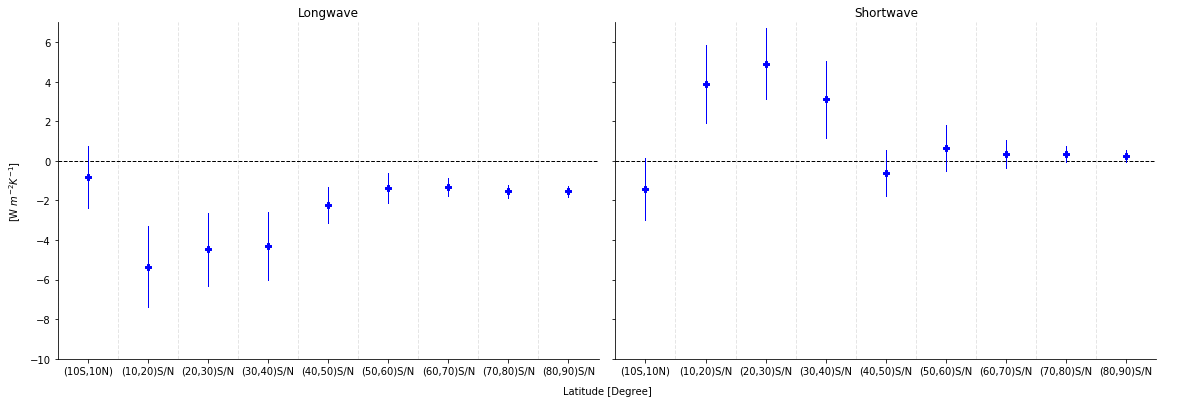

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import glob
input='/home/alejandro/CL_feedbacks/data/'
input_data='/home/alejandro/CL_feedbacks/data_prod/'
%matplotlib inline
Ty_sky='all'
fig, ax = plt.subplots(1,2, figsize=(17,6), sharey=True, sharex=True)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.ylabel('[W $m^{-2} K^{-1}$]', labelpad=35)
plt.xlabel('Latitude [Degree]', labelpad=10)
intervals=['(10S,10N)','(10,20)S/N','(20,30)S/N','(30,40)S/N','(40,50)S/N','(50,60)S/N',
           '(60,70)S/N','(70,80)S/N','(80,90)S/N']
domain='Local'
feed_lw=[];top_lw_IC=[];bot_lw_IC=[];feed_sw=[];top_sw_IC=[];bot_sw_IC=[]
for H in ('North', 'South'):
    DATA = np.load(input_data+'Feed_Ftropics_'+Ty_sky+'_NOSI_NOI_'+H+'_Had5.npz')
    #-----------------------------------------------------------------
    #------------------------ OBS ------------------------------------
    #-----------------------------------------------------------------
    c='blue'
    style='solid'
    sh=0
    feed_lw.append(DATA['feed_lw_'+domain])
    top_lw_IC.append(DATA['top_lw_IC_'+domain])
    bot_lw_IC.append(DATA['bot_lw_IC_'+domain])
    feed_sw.append(DATA['feed_sw_'+domain])
    top_sw_IC.append(DATA['top_sw_IC_'+domain])
    bot_sw_IC.append(DATA['bot_sw_IC_'+domain])
feed_lw=np.mean(feed_lw,axis=0)
top_lw_IC=np.mean(top_lw_IC,axis=0)
bot_lw_IC=np.mean(bot_lw_IC,axis=0)
feed_sw=np.mean(feed_sw,axis=0)
top_sw_IC=np.mean(top_sw_IC,axis=0)
bot_sw_IC=np.mean(bot_sw_IC,axis=0)
for i in range(len(intervals)):
    ax[0].scatter(i+sh,feed_lw[i],marker='P',color=c)
    ax[1].scatter(i+sh,feed_sw[i],marker='P',color=c)
    ax[0].plot([i+sh,i+sh],[bot_lw_IC[i],top_lw_IC[i]], color=c,linestyle=style, linewidth=1)
    ax[1].plot([i+sh,i+sh],[bot_sw_IC[i],top_sw_IC[i]], color=c,linestyle=style, linewidth=1)
    ax[0].vlines(x=i-0.5,ymin=-10,ymax=7,linestyle='--', color='black', lw=1,alpha=0.05)
    ax[0].vlines(x=i+0.5,ymin=-10,ymax=7,linestyle='--', color='black', lw=1,alpha=0.05)
    ax[1].vlines(x=i-0.5,ymin=-10,ymax=7,linestyle='--', color='black', lw=1,alpha=0.05)
    ax[1].vlines(x=i+0.5,ymin=-10,ymax=7,linestyle='--', color='black', lw=1,alpha=0.05)
ax[0].hlines(y=0, xmin=-0.5, xmax=9,linestyle='--', color='black', lw=1)
ax[1].hlines(y=0, xmin=-0.5, xmax=9,linestyle='--', color='black', lw=1)
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[0].set_xlim(-0.5,8.5)
ax[0].set_ylim(-10,7)
ax[0].set_title('Longwave')
ax[1].set_title('Shortwave')
ax[0].xaxis.set_ticks(np.arange(0, 9, 1))
ax[0].set_xticklabels(intervals)
fig.tight_layout()
plt.savefig('obs_feed.pdf', format='pdf')

*Figure 4. All sky Longwave (left) and shortwave (right) feedbacks. Bars indicate the 95% confidence intervals.*

Figure 4. shows longwave and shortwave feedbacks. Longwave feedbacks are negative across all latitudes with three distinctive features, first small negative feedback in the deep tropics, larger feedback in the subtropics, and nearly constant feedback in the extratropics.  Shortwave feedbacks also exhibit three trends, a negative value in the deep tropics, positive feedback in the extratropics, and approximately no feedback in the extratropics. To try to attribute those trends to cloud-related and not related feedbacks, I split the total feedbacks into clear-sky and cloud radiative effects as follows.

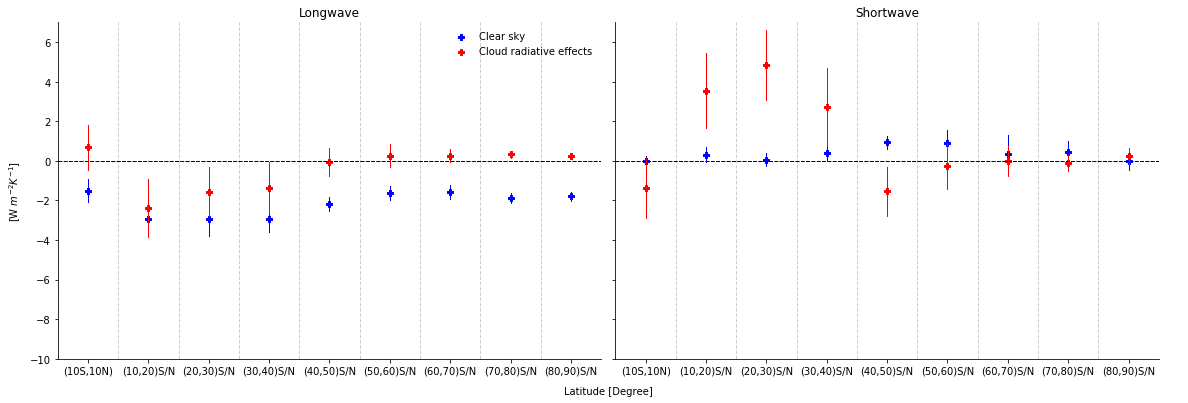

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import glob
input='/home/alejandro/CL_feedbacks/data/'
input_data='/home/alejandro/CL_feedbacks/data_prod/'
%matplotlib inline
fig, ax = plt.subplots(1,2, figsize=(17,6), sharey=True, sharex=True)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.ylabel('[W $m^{-2} K^{-1}$]', labelpad=35)
plt.xlabel('Latitude [Degree]', labelpad=10)
intervals=['(10S,10N)','(10,20)S/N','(20,30)S/N','(30,40)S/N','(40,50)S/N','(50,60)S/N',
           '(60,70)S/N','(70,80)S/N','(80,90)S/N']
domain='Local'
for Ty_sky,tit in zip(('cs','cre'),('Clear sky','Cloud radiative effects')):
    feed_lw=[];top_lw_IC=[];bot_lw_IC=[];feed_sw=[];top_sw_IC=[];bot_sw_IC=[]
    for H in ('North', 'South'):
        DATA = np.load(input_data+'Feed_Ftropics_'+Ty_sky+'_NOSI_NOI_'+H+'_Had5.npz')
        #-----------------------------------------------------------------
        #------------------------ OBS ------------------------------------
        #-----------------------------------------------------------------
        if Ty_sky=='cs':  
            c='blue'
        else:
            c='red'
        style='solid'
        sh=0
        feed_lw.append(DATA['feed_lw_'+domain])
        top_lw_IC.append(DATA['top_lw_IC_'+domain])
        bot_lw_IC.append(DATA['bot_lw_IC_'+domain])
        feed_sw.append(DATA['feed_sw_'+domain])
        top_sw_IC.append(DATA['top_sw_IC_'+domain])
        bot_sw_IC.append(DATA['bot_sw_IC_'+domain])
    feed_lw=np.mean(feed_lw,axis=0)
    top_lw_IC=np.mean(top_lw_IC,axis=0)
    bot_lw_IC=np.mean(bot_lw_IC,axis=0)
    feed_sw=np.mean(feed_sw,axis=0)
    top_sw_IC=np.mean(top_sw_IC,axis=0)
    bot_sw_IC=np.mean(bot_sw_IC,axis=0)
    for i in range(len(intervals)):
            ax[0].scatter(i+sh,feed_lw[i],marker='P',color=c,label=tit)
            ax[1].scatter(i+sh,feed_sw[i],marker='P',color=c)
            ax[0].plot([i+sh,i+sh],[bot_lw_IC[i],top_lw_IC[i]], color=c,linestyle=style, linewidth=1)
            ax[1].plot([i+sh,i+sh],[bot_sw_IC[i],top_sw_IC[i]], color=c,linestyle=style, linewidth=1)
            ax[0].vlines(x=i-0.5,ymin=-10,ymax=7,linestyle='--', color='black', lw=1,alpha=0.05)
            ax[0].vlines(x=i+0.5,ymin=-10,ymax=7,linestyle='--', color='black', lw=1,alpha=0.05)
            ax[1].vlines(x=i-0.5,ymin=-10,ymax=7,linestyle='--', color='black', lw=1,alpha=0.05)
            ax[1].vlines(x=i+0.5,ymin=-10,ymax=7,linestyle='--', color='black', lw=1,alpha=0.05)
    ax[0].hlines(y=0, xmin=-0.5, xmax=9,linestyle='--', color='black', lw=1)
    ax[1].hlines(y=0, xmin=-0.5, xmax=9,linestyle='--', color='black', lw=1)
    ax[0].spines['right'].set_color('none')
    ax[0].spines['top'].set_color('none')
    ax[1].spines['right'].set_color('none')
    ax[1].spines['top'].set_color('none')
    ax[0].legend(*[*zip(*{l:h for h,l in zip(*ax[0].get_legend_handles_labels())}.items())][::-1],loc=1,frameon=False)
    ax[0].set_xlim(-0.5,8.5)
    ax[0].set_ylim(-10,7)
    ax[0].set_title('Longwave')
    ax[1].set_title('Shortwave')
    ax[0].xaxis.set_ticks(np.arange(0, 9, 1))
    ax[0].set_xticklabels(intervals)
    fig.tight_layout()
plt.savefig('CS_CRE_feedbacks.pdf', format='pdf')

*Figure 5. Clear-sky and Cloud radiative effects longwave (left) and shortwave (right) feedbacks. Bars indicate the 95% confidence intervals.*

Since variations in the tropical feedbacks relate strongly to CRE, changes in clouds might explain the behavior in that area. Extratropical feedbacks are produced mostly by clear-sky feedbacks (Planck, water vapor, lapse rate, sea ice albedo, etc).  In the deep tropics, the positive longwave CRE feedback that counteracts the negative CS comes from rising clouds while remaining at nearly constant temperature (FAT hypothesis - Figure 6.) and increasing cloud cover (Figure 7.), whereas the negative shortwave feedback is related to the thickening of clouds. In the subtropics, longwave CRE negative feedbacks relate to decreasing cloud cover (potentially an IRIS effect) and thinning clouds, while the positive shortwave CRE feedbacks is a response of thinning clouds and reductions of cloud cover. 

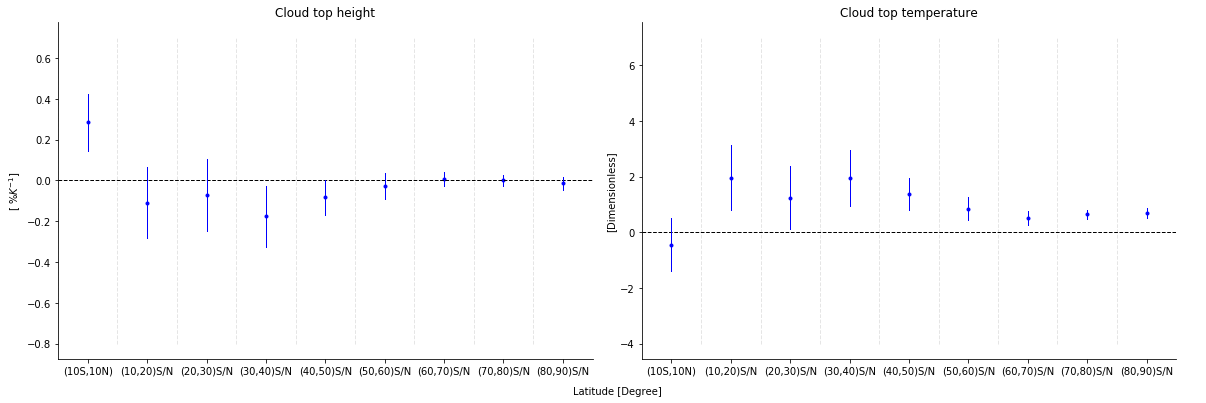

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import glob
input='/home/alejandro/CL_feedbacks/data/'
input_data='/home/alejandro/CL_feedbacks/data_prod/'
%matplotlib inline
fig, ax = plt.subplots(1,2, figsize=(17,6), sharey=False, sharex=True)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.xlabel('Latitude [Degree]', labelpad=10)
intervals=['(10S,10N)','(10,20)S/N','(20,30)S/N','(30,40)S/N','(40,50)S/N','(50,60)S/N',
           '(60,70)S/N','(70,80)S/N','(80,90)S/N']
domain='Local'
m_cth=[];top_cth_IC=[];bot_cth_IC=[];m_ctt=[];top_ctt_IC=[];bot_ctt_IC=[]
for H in ('North', 'South'):
    DATA = np.load(input_data+'CTH_NOSI_'+H+'_Had5.npz')
    m_cth.append(DATA['reg_cth_'+domain])
    top_cth_IC.append(DATA['top_cth_IC_'+domain]) 
    bot_cth_IC.append(DATA['bot_cth_IC_'+domain])
    m_ctt.append(DATA['reg_ctt_'+domain])
    top_ctt_IC.append(DATA['top_ctt_IC_'+domain]) 
    bot_ctt_IC.append(DATA['bot_ctt_IC_'+domain])
if domain=='Global':
    c='red'
else:
    c='blue'
m_cth=np.mean(m_cth,axis=0)
top_cth_IC=np.mean(top_cth_IC,axis=0)
bot_cth_IC=np.mean(bot_cth_IC,axis=0)
m_ctt=np.mean(m_ctt,axis=0)
top_ctt_IC=np.mean(top_ctt_IC,axis=0)
bot_ctt_IC=np.mean(bot_ctt_IC,axis=0)
for i in range(len(intervals)):
    ax[0].scatter(i,m_cth[i],marker='.',color=c)
    ax[1].scatter(i,m_ctt[i],marker='.',color=c)
    ax[0].plot([i,i],[bot_cth_IC[i],top_cth_IC[i]], color=c, linewidth=1)
    ax[1].plot([i,i],[bot_ctt_IC[i],top_ctt_IC[i]], color=c, linewidth=1)
    ax[0].vlines(x=i-0.5,ymin=-0.8,ymax=0.7,linestyle='--', color='black', lw=1,alpha=0.05)
    ax[0].vlines(x=i+0.5,ymin=-0.8,ymax=0.7,linestyle='--', color='black', lw=1,alpha=0.05)
    ax[1].vlines(x=i-0.5,ymin=-4,ymax=7,linestyle='--', color='black', lw=1,alpha=0.05)
    ax[1].vlines(x=i+0.5,ymin=-4,ymax=7,linestyle='--', color='black', lw=1,alpha=0.05)
ax[0].hlines(y=0, xmin=-0.5, xmax=9,linestyle='--', color='black', lw=1)
ax[1].hlines(y=0, xmin=-0.5, xmax=9,linestyle='--', color='black', lw=1)
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].set_xlim(-0.5,8.5)
ax[0].set_title('Cloud top height')
ax[1].set_title('Cloud top temperature')
ax[0].set_ylabel('[ $\% K^{-1}$]')
ax[1].set_ylabel('[Dimensionless]')
ax[0].xaxis.set_ticks(np.arange(0, 9, 1))
ax[0].set_xticklabels(intervals)
fig.tight_layout()  
plt.savefig('cloud_H_and_T.pdf', format='pdf')

*Figure 6. Cloud top height (left) and Cloud top temperature (right) regresion coefficients.  Bars indicate the 95% confidence intervals.*

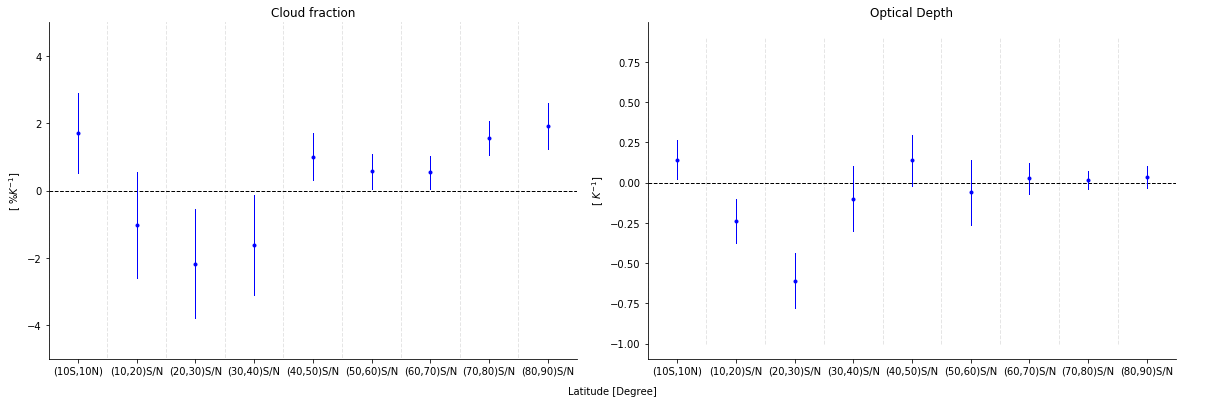

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import glob
input='/home/alejandro/CL_feedbacks/data/'
input_data='/home/alejandro/CL_feedbacks/data_prod/'
%matplotlib inline
fig, ax = plt.subplots(1,2, figsize=(17,6), sharey=False, sharex=True)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.xlabel('Latitude [Degree]', labelpad=10)
intervals=['(10S,10N)','(10,20)S/N','(20,30)S/N','(30,40)S/N','(40,50)S/N','(50,60)S/N',
           '(60,70)S/N','(70,80)S/N','(80,90)S/N']
domain='Local'
m_cth=[];top_cth_IC=[];bot_cth_IC=[];m_ctt=[];top_ctt_IC=[];bot_ctt_IC=[]
for H in ('North', 'South'):
    DATA = np.load(input_data+'optical_Ftropics_NOI_NOSI_'+H+'_Had5.npz')
    m_cth.append(DATA['reg_clda_'+domain])
    top_cth_IC.append(DATA['top_clda_IC_'+domain]) 
    bot_cth_IC.append(DATA['bot_clda_IC_'+domain])
    m_ctt.append(DATA['reg_cldt_'+domain])
    top_ctt_IC.append(DATA['top_cldt_IC_'+domain]) 
    bot_ctt_IC.append(DATA['bot_cldt_IC_'+domain])
c='blue'
m_cth=np.mean(m_cth,axis=0)
top_cth_IC=np.mean(top_cth_IC,axis=0)
bot_cth_IC=np.mean(bot_cth_IC,axis=0)
m_ctt=np.mean(m_ctt,axis=0)
top_ctt_IC=np.mean(top_ctt_IC,axis=0)
bot_ctt_IC=np.mean(bot_ctt_IC,axis=0)
for i in range(len(intervals)):
    ax[0].scatter(i,m_cth[i],marker='.',color=c)
    ax[1].scatter(i,m_ctt[i],marker='.',color=c)
    ax[0].plot([i,i],[bot_cth_IC[i],top_cth_IC[i]], color=c, linewidth=1)
    ax[1].plot([i,i],[bot_ctt_IC[i],top_ctt_IC[i]], color=c, linewidth=1)
    ax[0].vlines(x=i-0.5,ymin=-10,ymax=16,linestyle='--', color='black', lw=1,alpha=0.05)
    ax[0].vlines(x=i+0.5,ymin=-10,ymax=16,linestyle='--', color='black', lw=1,alpha=0.05)
    ax[1].vlines(x=i-0.5,ymin=-1,ymax=0.9,linestyle='--', color='black', lw=1,alpha=0.05)
    ax[1].vlines(x=i+0.5,ymin=-1,ymax=0.9,linestyle='--', color='black', lw=1,alpha=0.05)
ax[0].hlines(y=0, xmin=-0.5, xmax=9,linestyle='--', color='black', lw=1)
ax[1].hlines(y=0, xmin=-0.5, xmax=9,linestyle='--', color='black', lw=1)
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[1].set_xlim(-0.5,8.5)
ax[0].set_ylim(-5,5)
ax[0].set_title('Cloud fraction')
ax[1].set_title('Optical Depth')
ax[0].set_ylabel('[ $\% K^{-1}$]')
ax[1].set_ylabel('[ $K^{-1}$]')
ax[0].xaxis.set_ticks(np.arange(0, 9, 1))
ax[0].set_xticklabels(intervals)
fig.tight_layout()
plt.savefig('cloud_properties.pdf', format='pdf')

*Figure 7. Cloud fraction (left) and optical depth (right) regression coefficients.  Bars indicate the 95% confidence intervals.*

## 3.2 Simulated feeedbacks

Observed feedbacks (blue boxes) and simulated feedbacks are shown in Figure 8. Tropical longwave feedbacks are on average biased from observations, for both CMIP6 and AMIP datasets (top). In CMIP6 (black) the difference locates in the deep tropics (10S to 10N), whereas for AMIP (green) it comes from 10S/N to 30S/N. For shortwave feedbacks, CMIP6 models exhibit a remarkable agreement with observation across all latitudes. This is not the case for AMIP, particularly within the tropics. By decomposing the all-sky feedback into CS and CRE, it is possible to attribute those biases to the simulation of tropical clouds (middle and bottom).  

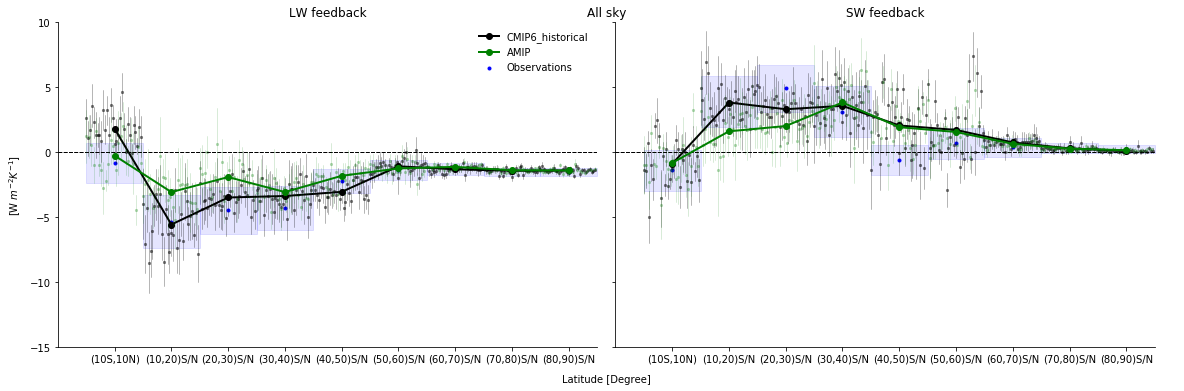

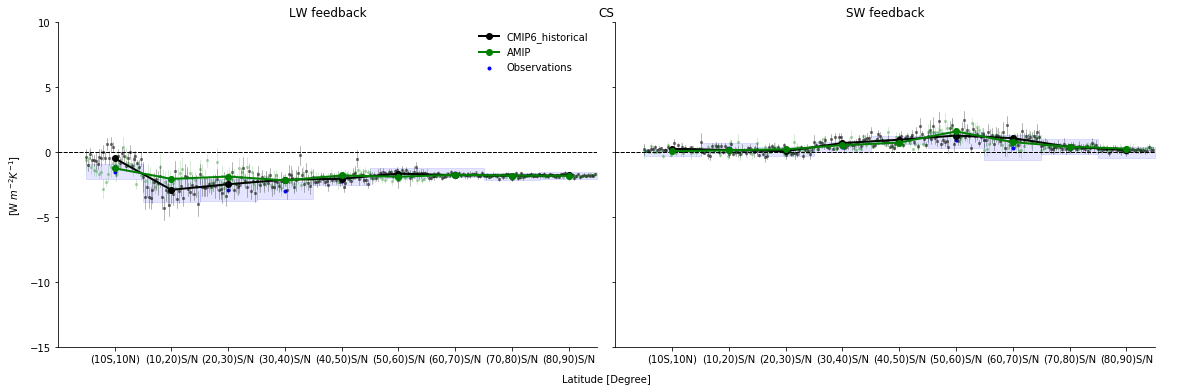

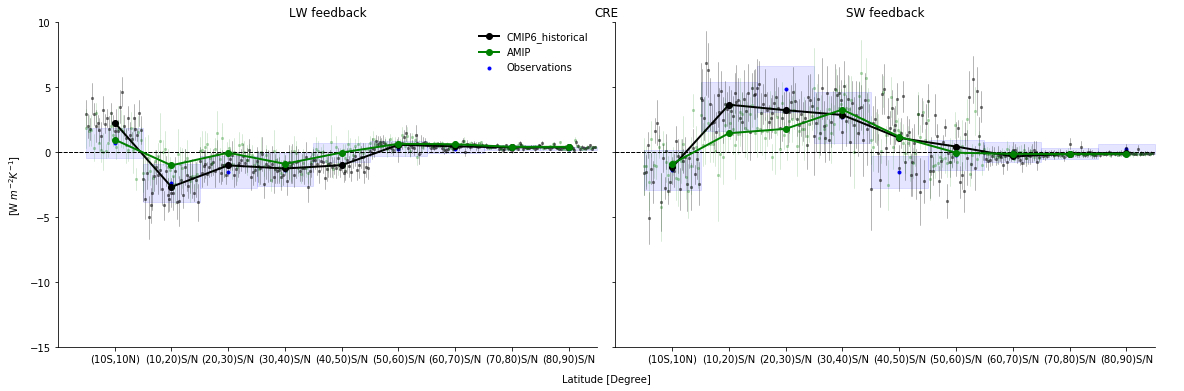

In [9]:
%matplotlib inline
for Ty_sky,tit in zip(('all','cs','cre'),('All sky','CS', 'CRE')):
    fig, ax = plt.subplots(1,2, figsize=(17,6), sharey=True, sharex=True)
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
    plt.ylabel('[W $m^{-2} K^{-1}$]', labelpad=35)
    plt.xlabel('Latitude [Degree]', labelpad=10)
    plt.title(tit)
    intervals=['(10S,10N)','(10,20)S/N','(20,30)S/N','(30,40)S/N','(40,50)S/N','(50,60)S/N',
               '(60,70)S/N','(70,80)S/N','(80,90)S/N']
    domain='Local'
    feed_lw=[];top_lw_IC=[];bot_lw_IC=[];feed_sw=[];top_sw_IC=[];bot_sw_IC=[]
    for H in ('North', 'South'):
        DATA = np.load(input_data+'Feed_Ftropics_'+Ty_sky+'_NOSI_NOI_'+H+'_Had5.npz')
        #-----------------------------------------------------------------
        #------------------------ OBS ------------------------------------
        #-----------------------------------------------------------------
        if domain=='Global':
            c='red'
        else:
            c='blue'
        feed_lw.append(DATA['feed_lw_'+domain])
        top_lw_IC.append(DATA['top_lw_IC_'+domain])
        bot_lw_IC.append(DATA['bot_lw_IC_'+domain])
        feed_sw.append(DATA['feed_sw_'+domain])
        top_sw_IC.append(DATA['top_sw_IC_'+domain])
        bot_sw_IC.append(DATA['bot_sw_IC_'+domain])
    feed_lw=np.mean(feed_lw,axis=0)
    top_lw_IC=np.mean(top_lw_IC,axis=0)
    bot_lw_IC=np.mean(bot_lw_IC,axis=0)
    feed_sw=np.mean(feed_sw,axis=0)
    top_sw_IC=np.mean(top_sw_IC,axis=0)
    bot_sw_IC=np.mean(bot_sw_IC,axis=0)
    ax[0].scatter(intervals,feed_lw,marker='.',color=c,label='Observations')
    ax[1].scatter(intervals,feed_sw,marker='.',color=c)
    for i in range(len(intervals)):
        ax[0].fill_between(np.linspace(i-0.5,i+0.5),bot_lw_IC[i],top_lw_IC[i], color=c, alpha=0.1)
        ax[1].fill_between(np.linspace(i-0.5,i+0.5),bot_sw_IC[i],top_sw_IC[i], color=c, alpha=0.1)
    exps=[]
    names=''
    for experiment,name in zip(('CMIP6_historical','AMIP'),('HIS-','AMIP-')):
        names=names+name
        exps.append(experiment)
        domain='Local' 
        #-----------------------------------------------------------------
        #------------------------ CMIP6 ----------------------------------
        #-----------------------------------------------------------------
        for exp in exps:
            models=[]
            for i in glob.glob(input+exp+'/*'):
                models.append(i.replace('/home/alejandro/CL_feedbacks/data/'+exp+'/',''))
            if exp=='CMIP6_4xCO2':
                c='magenta'
            elif exp=='CMIP6_historical':
                c='black'
            elif exp=='AMIP':
                c='green'
            mean_mod_lw=[];mean_mod_sw=[]
            for k,mod in enumerate(models):
                m_lw=[];bot_lw_IC=[];top_lw_IC=[];m_sw=[];bot_sw_IC=[];top_sw_IC=[]
                for H in ('North', 'South'):
                    DATA = np.load(input_data+'Feed_Ftropics_'+Ty_sky+'_NOSI_NOI_'+H+'.npz')
                    m_lw.append(DATA[exp+'_'+mod+'_m_lw_'+domain])
                    bot_lw_IC.append(DATA[exp+'_'+mod+'_lw_IC_min_'+domain])
                    top_lw_IC.append(DATA[exp+'_'+mod+'_lw_IC_max_'+domain])
                    m_sw.append(DATA[exp+'_'+mod+'_m_sw_'+domain])
                    bot_sw_IC.append(DATA[exp+'_'+mod+'_sw_IC_min_'+domain])
                    top_sw_IC.append(DATA[exp+'_'+mod+'_sw_IC_max_'+domain])
                m_lw=np.mean(m_lw,axis=0)
                bot_lw_IC=np.mean(bot_lw_IC,axis=0)
                top_lw_IC=np.mean(top_lw_IC,axis=0)
                m_sw=np.mean(m_sw,axis=0)
                bot_sw_IC=np.mean(bot_sw_IC,axis=0)
                top_sw_IC=np.mean(top_sw_IC,axis=0)
                mean_mod_lw.append(m_lw)
                mean_mod_sw.append(m_sw)
                for j in range(len(intervals)):
                    xtick_mo=j-0.5+k/(len(models))
                    ax[0].scatter(xtick_mo,m_lw[j],marker='.',color=c,linewidth=0.1, alpha=0.3)
                    ax[1].scatter(xtick_mo,m_sw[j],marker='.',color=c,linewidth=0.1, alpha=0.3)
                    ax[0].plot([xtick_mo,xtick_mo],[bot_lw_IC[j],top_lw_IC[j]],color=c, linewidth=0.5, alpha=0.3)
                    ax[1].plot([xtick_mo,xtick_mo],[bot_sw_IC[j],top_sw_IC[j]],color=c, linewidth=0.5, alpha=0.3)
            mean_lw=np.mean(mean_mod_lw,axis=0)
            mean_sw=np.mean(mean_mod_sw,axis=0)
        ax[0].plot(intervals,mean_lw,marker='o',linewidth=2,color=c, label=exp)
        ax[1].plot(intervals,mean_sw,marker='o',linewidth=2,color=c)
        ax[0].hlines(y=0, xmin=-1, xmax=9,linestyle='--', color='black', lw=1)
        ax[1].hlines(y=0, xmin=-1, xmax=9,linestyle='--', color='black', lw=1)
        ax[0].spines['right'].set_color('none')
        ax[0].spines['top'].set_color('none')
        ax[1].spines['right'].set_color('none')
        ax[1].spines['top'].set_color('none')
        ax[0].set_title('LW feedback')
        ax[0].legend(*[*zip(*{l:h for h,l in zip(*ax[0].get_legend_handles_labels())}.items())][::-1],loc=1,frameon=False)
        ax[1].set_title('SW feedback')
        ax[0].set_xlim(-1,8.5)
        ax[0].set_ylim(-15,10)
    fig.tight_layout()
    plt.savefig('mod_feedbacks'+Ty_sky+'.pdf', format='pdf')

*Figure 8. Observed and simulated feedbacks for All-sky (top), CS (middle) and CRE (bottom). Bars and boxes indicate the 95% confidence intervals.*

To investigate if the above internal variability feedbacks are related to $CO_2$ forcing feedbacks, I calculated anomalies of air temperature and TOA fluxes for a set of models from the abrupt increase of $CO_2$ experiments (TAble 1.). The anomalies were computed by taking the differences between pre-industrial concentration and increases $CO_2$ simulations, then feedbacks were diagnosed by performing the regressions. Figure 9. shows the one-to-one comparison between internal variability and $CO_2$ feedbacks, plus their lineal relation. The approximately one-to-one relation indicates a high probability that the internal variability features are also present with $CO_2$ forcings.

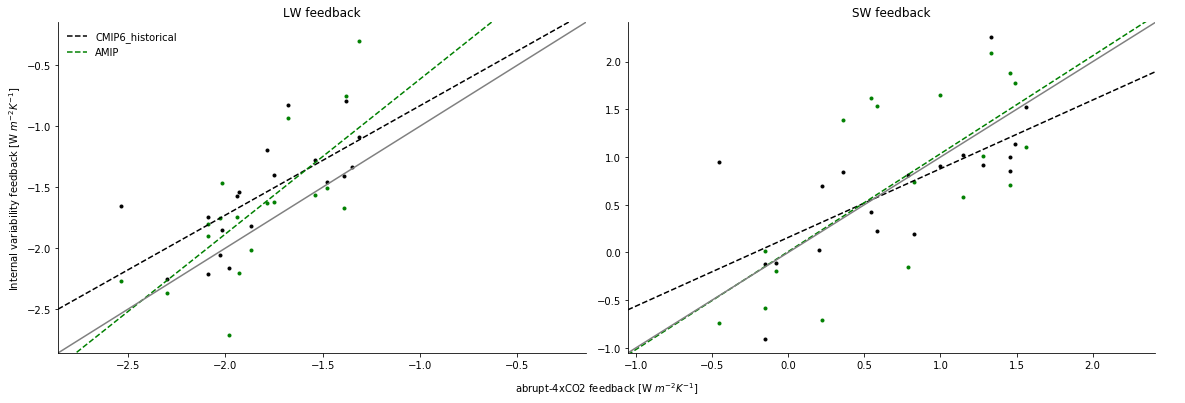

In [10]:
import os
import statsmodels.api as sm
import itertools
from statsmodels.graphics.regressionplots import abline_plot
equ_hist = os.popen("diff -q  /home/alejandro/CL_feedbacks/data/CMIP6_historical/ /home/alejandro/CL_feedbacks/data/CMIP6_4xCO2/ | grep Common* | cut -d' ' -f 5 | cut -d'/' -f 7").read().split('\n')#.remove('')
equ_hist.remove('')
equ_amip = os.popen("diff -q  /home/alejandro/CL_feedbacks/data/AMIP/ /home/alejandro/CL_feedbacks/data/CMIP6_4xCO2/ | grep Common* | cut -d' ' -f 5 | cut -d'/' -f 7").read().split('\n')#.remove('')
equ_amip.remove('')
%matplotlib inline
Ty_sky='all'
fig, ax = plt.subplots(1,2, figsize=(17,6), sharey=False, sharex=False)
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)
plt.ylabel('Internal variability feedback [W $m^{-2} K^{-1}$]', labelpad=35)
plt.xlabel('abrupt-4xCO2 feedback [W $m^{-2} K^{-1}$]', labelpad=10)
intervals=['(10S,10N)','(10,20)S/N','(20,30)S/N','(30,40)S/N','(40,50)S/N','(50,60)S/N',
           '(60,70)S/N','(70,80)S/N','(80,90)S/N']
exps=[]
names=''
LW=[]
SW=[]
for exp,name in zip(('CMIP6_historical','AMIP'),('HIS-','AMIP-')):
    if exp=='CMIP6_historical':
        models=equ_hist
        c='black'
    else:
        models=equ_amip
        c='green'
    m_mod_lw=[];m_mod_sw=[];m_mod_ab_lw=[];m_mod_ab_sw=[]
    for k,mod in enumerate(models):
        DATA = np.load(input_data+'Feed_global_'+Ty_sky+'_Had5.npz')
        m_lw=DATA[exp+'_'+mod+'_m_lw']
        m_mod_lw.append(m_lw)
        m_sw=DATA[exp+'_'+mod+'_m_sw']
        m_mod_sw.append(m_sw)
        m_lw_ab=DATA['CMIP6_4xCO2_'+mod+'_m_lw']
        m_mod_ab_lw.append(m_lw_ab)
        m_sw_ab=DATA['CMIP6_4xCO2_'+mod+'_m_sw']
        m_mod_ab_sw.append(m_sw_ab)
        ax[0].scatter(m_lw_ab,m_lw,marker='.',color=c)
        ax[1].scatter(m_sw_ab,m_sw,marker='.',color=c)
    LW.append(m_mod_ab_lw)
    LW.append(m_mod_lw)
    SW.append(m_mod_ab_sw)
    SW.append(m_mod_sw)
    x = sm.add_constant(m_mod_ab_lw)
    y = m_mod_lw
    model = sm.OLS(y, x, missing='drop')
    abline_plot(model_results=model.fit(),linestyle='--',color=c, ax=ax[0], label=f"{exp}")
    #
    x = sm.add_constant(m_mod_ab_sw)
    y = m_mod_sw
    model = sm.OLS(y, x, missing='drop')
    abline_plot(model_results=model.fit(),linestyle='--',color=c, ax=ax[1], label=f"{exp}")
min_lw=np.min(list(itertools.chain(*LW)))
max_lw=np.max(list(itertools.chain(*LW)))
min_sw=np.min(list(itertools.chain(*SW)))
max_sw=np.max(list(itertools.chain(*SW)))
ax[0].plot([min_lw-0.15, max_lw+0.15], [min_lw-0.15, max_lw+0.15],color='grey')
ax[1].plot([min_sw-0.15, max_sw+0.15], [min_sw-0.15, max_sw+0.15],color='grey')
ax[0].spines['right'].set_color('none')
ax[0].spines['top'].set_color('none')
ax[1].spines['right'].set_color('none')
ax[1].spines['top'].set_color('none')
ax[0].set_title('LW feedback')
ax[0].legend(*[*zip(*{l:h for h,l in zip(*ax[0].get_legend_handles_labels())}.items())][::-1],loc='best',frameon=False)
ax[1].set_title('SW feedback')
ax[0].set_xlim(min_lw-0.15,max_lw+0.15)
ax[0].set_ylim(min_lw-0.15,max_lw+0.15)
ax[1].set_xlim(min_sw-0.15,max_sw+0.15)
ax[1].set_ylim(min_sw-0.15,max_sw+0.15)
fig.tight_layout()  
plt.savefig('abru_his.pdf', format='pdf')

*Figure 9. Internal variability vs abrupt-4xCO2 feedbacks. Discontinuous lines indicate the feedback linear relation and the solid line depicts a perfect relation.*